# Közlekedési hálózatok vizsgálata

In [2]:
from scipy.io import mmread
import konect2networkx as k2n
import networkx as nx
import matplotlib.pyplot as plt
import pprint
import pickle
import csv

Közlekedési hálózatok gráfjait fogom vizsgálni feszítőfák segítségével. Generálok n darab feszítőfát és azon belül megnézem, hogy a különöző élek milyen valószínűséggel fordulnak elő a feszítőfákban. Ez által kaphatunk egy képet arról, hogy az adott hálózatban melyek a legnagyobb jelentőséggel bíró élek, azaz kapcsolatok.

## Gráf beolvasása fájlból

In [3]:
## import network
# param: internal name of the network (konect graph) or name of the file w extension (.mtx format only)
def network_graph(network, split=""):
    #ext = network[len(network) - 4:]

    if (network[len(network) - 4:] == ".mtx"):
        try:
          a = mmread(network)
          G = nx.Graph(a)
        except:
          print("Nincs ilyen .mtx fájl a mappában")
    elif (network[len(network) - 6:] == ".edges"):
      edgelist = []
      try:
        with open("./" + network) as edges:
          rd = csv.reader(edges, delimiter=split)
          for row in rd:
            row[0] = int(row[0])
            row[1] = int(row[1])
            edgelist.append(tuple(row))
        G = nx.Graph()
        G.add_edges_from(edgelist) 
      except:
          print("Nincs ilyen .edges fájl a mappában.")
    else:
        try:
          G = k2n.get(network, download = True, logging = False)
        except:
          print("Nem létezik ilyen nevű konect gráf")
    
    return G

Jelenleg kétféle fájlformátumot fogad el a metódus: *.mtx* kiterjesztést vagy kiterjesztés nélküli konect gráfot. A konect gráfokat valójában csak egy string határozza meg, amit a *konect2networkx* függvénykönyvtár értelmez.<br>A visszatérési érték egy gráf lesz.

A függvény megvizsgálja a kiterjesztést, majd *mtx* fájl esetében megpróbálja beolvasni a fájlt abból a mappából, amiben a notebook is található. Ha nem találja, figyelmeztet a hibára. Ha kiterjesztés nélküli stringet adunk meg a paraméterben, konect gráfként értelmezi. Ha nem találja az adott nevű gráfot, hibát dob.

#### Segédfüggvények az éllista adatszerkezetének változtatásához
Dictionary-ból tömbbé alakítás (vagy fordítva).

In [130]:
def dict_to_array(dict_name):
  res_arr = [[0 for i in range(0, len(dict_name.keys()))] for j in range(2)]
  
  i = 0
  for k, v in dict_name.items():
      res_arr[0][i] = k
      res_arr[1][i] = round(v, 4)
      i+=1

  return res_arr

In [5]:
def array_to_dict(array_name):
  res_d = dict(zip(array_name[0], array_name[1]))
  return res_d

## 1.1 Uniform véletlen feszítőfák (UST) generálása

Egy gráfnak több feszítőfája is lehet. Egy véletlenszerűen kiválasztott feszítőfát nevezünk UST-nek.

In [6]:
# param: the graph, number of generated ust graphs(int)
def ust_matrix(G, n):
  #orig_edges = list(G.edges())
  orig_edges = sorted([(min(u, v), max(u, v)) for u, v in list(G.edges())])

  # initalizing 2d matrix 
  res = [[0 for i in range(0, G.number_of_edges())] for j in range(n+1)]
    
  # copying the edge list into the first row of the matrix
  for i in range(G.number_of_edges()):
      res[0][i] = orig_edges[i]

  for i in range(1, n+1):
      # generating n number of ust graphs
      tree = nx.random_spanning_tree(G, None)
      tree_edges = list(tree.edges())
      sorted_edges = sorted([(min(u, v), max(u, v)) for u, v in tree_edges])
      for item in sorted_edges:
          # checking if an edge is in the ust or not
          index = orig_edges.index(item)
          res[i][index] = 1

  return res

Paraméterben a gráfot kell megadni (amit a *network_graph()* metódus ad vissza) és egy számot, amennyi feszítőfát generálni akarunk.<br>A függvény egy 2D-s tömbbel, azaz egy mátrixszal tér vissza. Ennek a tömbnek az első sorában az eredeti gráf élei találhatóak, pontpárok segítségével megadva. Ezt értelmezzük egy táblázat fejléceként. A 2D-s tömb további sorai az egyes legenerált UST-ket jellemzi. A sorokban 0 vagy 1 található, aszerint, hogy a feszítőfába belekerült-e az az él, amit az adott oszlop fejléce leír.

#### Print matrix
Segédfüggvény a gráf csúcsainak és élsúlyainak egyértelmű kiíratásához.

In [7]:
def print_res(res):
  if (type(res) == dict):
      pprint.pprint(res)
  elif (len(res) > 2 and isinstance(res[2], list)):
    print("\n")
    for row in res:
      print(row)
  else:
    if (type(res) == list):
      res = array_to_dict(res)
      pprint.pprint(res)

#### Példa egy konect gráffal

[KONECT2NetworkX] Attemping to download network to brunson_southern-women.tar.bz2
[KONECT2NetworkX] HTTP request successful, writing network to brunson_southern-women.tar.bz2
[KONECT2NetworkX] Network successfully unpacked!


[(1, 6), (1, 7), (1, 8), (2, 7), (2, 8), (3, 6), (3, 9), (3, 10), (4, 6), (4, 9), (4, 7), (5, 9), (5, 8), (5, 10)]
[0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0]
[1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0]
[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0]
[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1]
[0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1]
[1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1]

Eredeti gráf:


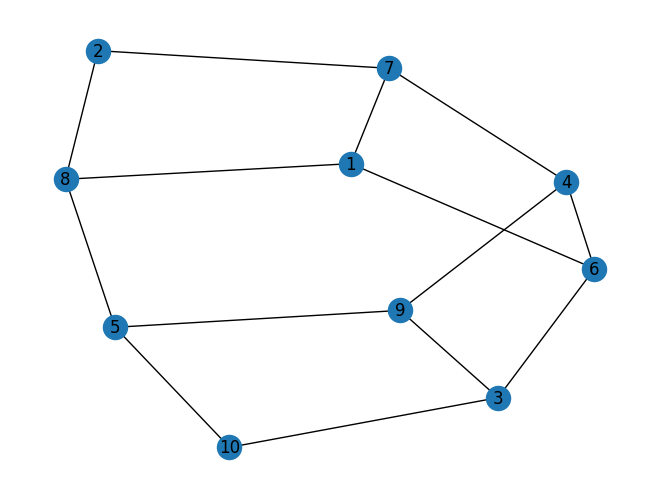

In [108]:
G = network_graph('brunson_southern-women')
res = ust_matrix(G, 6)

print_res(res)

# drawing original konect graph
G2 = nx.Graph()
G2.add_edges_from(res[0])
print("\nEredeti gráf:")
nx.draw(G2, with_labels=True)

Példa gráf bemutatása. Az eredeti gráfról láthatunk képet. Ennek a gráfnak 10 pontja és 14 éle van, így több kör is található benne. 6 darab uniform véletlen feszítőfát generáltunk, ami megjelenik a 2D-s tömbben.

#### Példa egy mtx-ből beolvasott gráffal


Eredeti gráf:


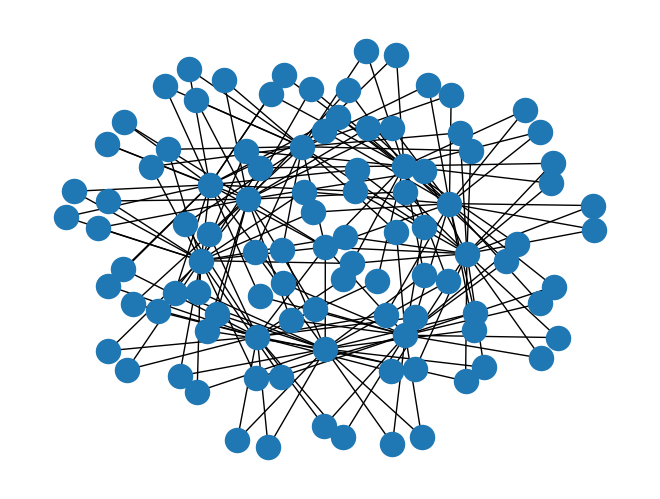

In [181]:
G = network_graph('GD06_theory.mtx')
res = ust_matrix(G, 6)

#print_res(res)

# plotting a graph with .mtx extension
G2 = nx.Graph()
G2.add_edges_from(res[0])
print("\nEredeti gráf:")
pos = nx.spring_layout(G)
nx.draw(G2, pos, with_labels=False)

Példa egy nagyobb gráfot használva. Ennek a gráfnak 101 pontja és  190 éle van. Most is 6 darab UST-t generáltunk.

## 1.2 UST gráfok alapján normalizálás

In [16]:
# param: a matrix returned by the ust_matrix() func
def ust_normalized(res):

  number_of_edges = len(res[0])
  number_of_ust = len(res)
  normal_res = [[0 for i in range(number_of_edges)] for j in range(2)]

  # copy edgelist of the original graph
  normal_res[0] = res[0]

  for i in range(1, number_of_ust):
    for j in range(number_of_edges):
      normal_res[1][j] += res[i][j]
   
  # normalization
  for j in range(number_of_edges):
    if (normal_res[1][j] != 0):
      normal_res[1][j] = round(normal_res[1][j]/(number_of_ust-1), 4)

  return normal_res

Paraméterben a *ust_matrix()* függvény által visszaadott 2D-s tömböt kell megadni.<br>A visszatérési érték szintén egy 2D-s tömb lesz, viszont most csak két sora van. Az első ugyanaz a fejléc sor, ami az eredeti gráf éleit tartalmazza, míg a második sor az előző mátrix 0-kat és 1-eseket tartalmazó sorai normalizálva. Most az egyes értékek 0 és 1 közötti float érték. Ha 1 az érték, akkor benne volt az él minden generált véletlen feszítőfában.

## 1.3 Normalizált értékek megjelenítése grafikusan

In [144]:
## drawing weighted graph
# param: normal_res (a matrix returned by the konect_ust_normalized() func); with_node_labels (bool); with_edge_labels (bool); pos (dict, optional) 
def draw_normalized(normal_res, colormap = False, with_node_labels = False, with_edge_labels = True, edge_font_size = 10, with_zero_edges = True, edge_threshold = 0.0, fig_width = 12, fig_height = 10, pos = [], with_mst = False):
  G = nx.Graph()
  szorzo = 6

  if (type(normal_res) == dict):
    normal_res = dict_to_array(normal_res)
    szorzo = 24

  # add edges
  if (edge_threshold > 0.0):
    for j in range(len(normal_res[0])):
      if (normal_res[1][j] > edge_threshold):
        G.add_edge(normal_res[0][j][0], normal_res[0][j][1], weight=normal_res[1][j] )
  elif (with_zero_edges):
    for j in range(len(normal_res[0])):
      G.add_edge(normal_res[0][j][0], normal_res[0][j][1], weight=normal_res[1][j] )
  else:
    for j in range(len(normal_res[0])):
      if (normal_res[1][j] > 0):
        G.add_edge(normal_res[0][j][0], normal_res[0][j][1], weight=normal_res[1][j] )

  if (not colormap):
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] is not None and d["weight"] >= 0.65]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] is not None and d["weight"] < 0.65 and d["weight"] > 0.4]
    enone = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] is not None and d["weight"] <= 0.4]

  # generate new layout if none is provided
  if (len(pos) == 0):
    pos = nx.spring_layout(G)
  
  # nodes and resolution
  if (len(G.edges) > 150):
    custom_node_size = 50
    edge_width = 3
  elif (len(G.edges) > 70):
    custom_node_size = 80
    edge_width = 4
  else:
    custom_node_size = 100 #300
    edge_width = 5 #6

  if (colormap):
      fig_width = fig_width+2
      
  plt.figure(num=None, figsize=(fig_width, fig_height), dpi=50)
  
  nx.draw_networkx_nodes(G, pos, node_size=custom_node_size, node_color="#000")

  # edges
  if (colormap):
    edges = G.edges()
    edges_weight_list = [G[u][v]['weight']*szorzo for u,v in edges]
    edgelist, edge_color = zip(*nx.get_edge_attributes(G,'weight').items())
    edges = nx.draw_networkx_edges(G, pos, edgelist=edgelist, edge_color=edge_color, edge_cmap=plt.cm.coolwarm, width=edges_weight_list)
    plt.colorbar(edges)
  else:
    nx.draw_networkx_edges(G, pos, edgelist=enone, width=edge_width-1.5, edge_color="#8EA604") # green
    nx.draw_networkx_edges(G, pos, edgelist=esmall, width=edge_width, edge_color="#094D92") # blue
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=edge_width, edge_color="#ce0000") # red

  # node labels
  if (with_node_labels):
    nx.draw_networkx_labels(G, pos, font_color="#fff")
  
  # edge weight labels
  if (with_edge_labels):
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=edge_font_size)

  ax = plt.gca()
  ax.margins(0)
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.show()

  if (with_mst):
    T = nx.maximum_spanning_tree(G)

    if (colormap):
      fig_width = fig_width-2

    plt.figure(num=None, figsize=(fig_width, fig_height), dpi=50)

    nx.draw_networkx_nodes(G, pos, node_size=custom_node_size, node_color="#000")
    nx.draw_networkx_edges(T, pos, width=edge_width, edge_color="#ce0000")

    # node labels
    if (with_node_labels):
      nx.draw_networkx_labels(T, pos, font_color="#fff")
  
    # edge weight labels
    if (with_edge_labels):
      edge_labels = nx.get_edge_attributes(T, "weight")
      nx.draw_networkx_edge_labels(T, pos, edge_labels, font_size=edge_font_size)

    ax = plt.gca()
    ax.margins(0)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

  return pos

Paraméterben a normalizált értékeket tartalmazó tömböt kell megadni. Opcionális paraméterben azt is meg lehet adni, hogy szeretnénk-e a csúcsok vagy az élek címkéit ábrázolni. A *pos* paraméterben egy dictionary típust vár, ami a csúcsok koordinátáit határozza meg.<br>A metódus grafikusan megjeleníti a normalizált feszítőfát. A visszatérési érték a *pos* dictionary, amit vagy paraméterben megadtunk, vagy a függvény generált le. Ez a *pos* érték segítségével tudjuk megjeleníteni ugyanazt a gráfot (ugyanazzal a csúcs-elrendezéssel), a függvény többszöri meghívásával is.

Az eredménygráfban minden él szerepel, ami az eredeti gráfban is szerepelt, viszont a formázása változik a következő módon:
* Ha az él legalább 50% eséllyel fordult elő, akkor vastag piros vonallal jelenik meg.
* Ha kevesebb, mint 50% viszont több, mint 10% esélye van, akkor kék színnel jelenik meg az él.
* Egyébként világoszöld vonal köti össze a pontokat.

Az egyes élekre a normalizált értékük is rá van írva, ha a *with_edge_labels* paraméternek True értéket adtunk meg.

#### Példa egy normalizált konect gráffal

[KONECT2NetworkX] Attemping to download network to brunson_southern-women.tar.bz2
[KONECT2NetworkX] HTTP request successful, writing network to brunson_southern-women.tar.bz2
[KONECT2NetworkX] Network successfully unpacked!
{(1, 6): 0.62,
 (1, 7): 0.5933,
 (1, 8): 0.66,
 (2, 7): 0.69,
 (2, 8): 0.66,
 (3, 6): 0.6267,
 (3, 9): 0.6033,
 (3, 10): 0.7367,
 (4, 6): 0.4967,
 (4, 7): 0.67,
 (4, 9): 0.6633,
 (5, 8): 0.7067,
 (5, 9): 0.5667,
 (5, 10): 0.7067}


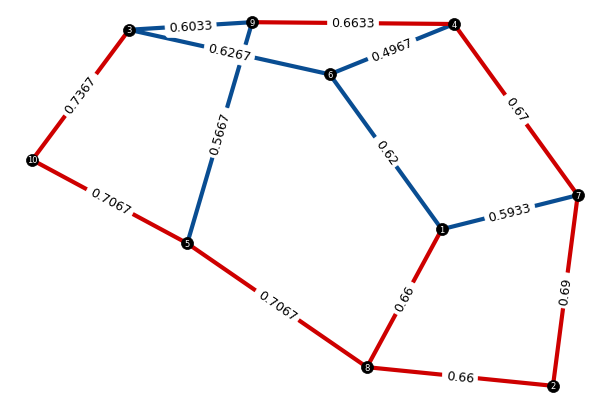

In [17]:
G = network_graph('brunson_southern-women')
res = ust_matrix(G, 300)
normal_res1 = ust_normalized(res)
#pickle.dump(normal_res1,open("pickle/brunson_southern-women_normalized_300.ls","wb"))
#normal_res1 = pickle.load(open("pickle/brunson_southern-women_normalized_300.ls","rb"))

print_res(normal_res1)

pos1 = draw_normalized(normal_res1, with_node_labels = True, edge_font_size = 18, fig_height = 8)
#pos1 = draw_normalized(normal_res1, with_node_labels = True, edge_font_size = 18, fig_height = 8, pos=pos1)

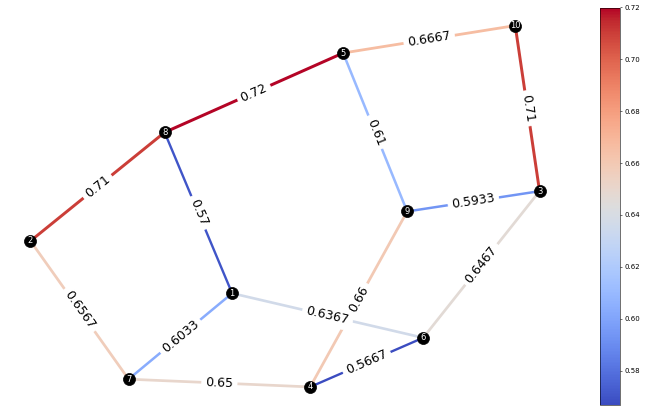

In [165]:
pos1 = draw_normalized(normal_res1, colormap=True, with_node_labels = True, edge_font_size = 18, fig_height = 8, pos=pos1)

Az előbb is használt konect gráfot vettük példának, de most 300 UST-t generáltunk, hogy pontosabb normalizált értékeket kapjunk.<br>A példán látszik, hogy melyik élek bírnak a legnagyobb jelentőséggel.

Az eredményről leolvashatóak a csúcspontok nevei (számai) és az élek súlyainak értékei.

#### Példa egy normalizált, mtx-ből beolvasott gráffal

In [149]:
G = network_graph('GD06_theory.mtx')
res = ust_matrix(G, 300)
normal_res2 = ust_normalized(res)
#pickle.dump(normal_res2,open("pickle/GD06_theory_normalized.ls_300","wb"))
#normal_res2 = pickle.load(open("pickle/GD06_theory_normalized.ls_300","rb"))

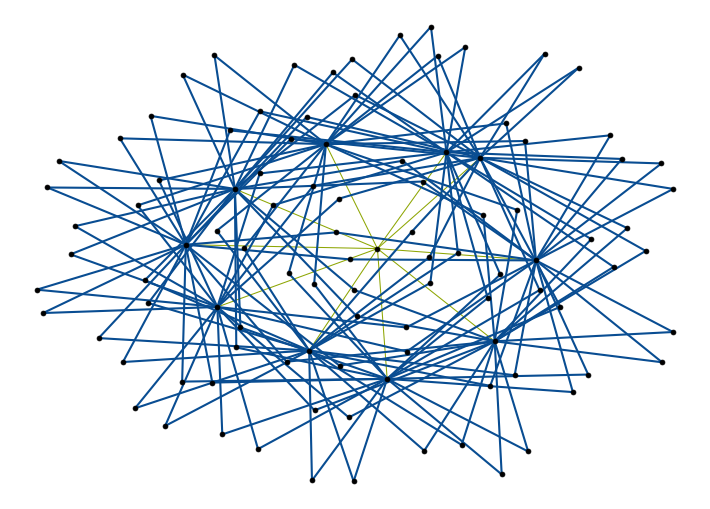

In [153]:
pos2 = draw_normalized(normal_res2, with_edge_labels=False, fig_width=14, pos=pos2)

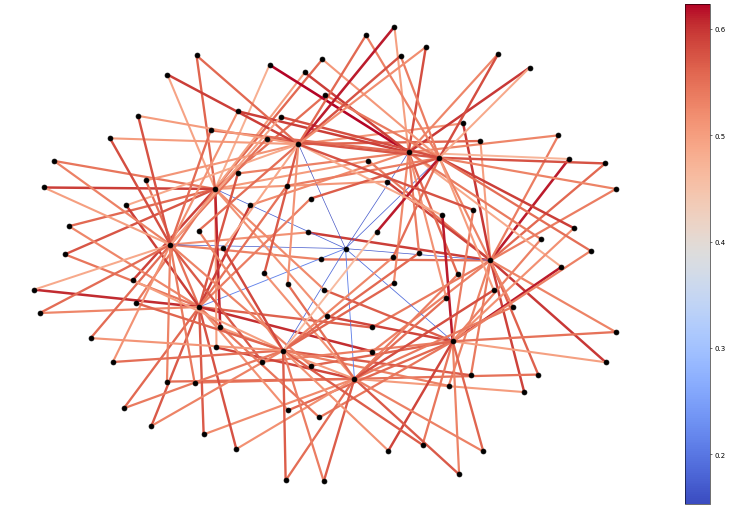

In [154]:
pos2 = draw_normalized(normal_res2, colormap=True, with_edge_labels=False, fig_width=14, pos=pos2)

Ez esetben is 300 feszítőfát generáltunk.

## 2. Betweenness centrality használata

Központisági mérőszám. A gráfban meghatározzuk a legrövidebb utakat minden csomópontpár között. Egy pont BC értéke ezeken az utakon alapul aszerint, hogy hány ilyen legrövidebb út tartalmazza. Értéke 0 és 1 között lehet, ahol 1 a maximum érték.

In [ ]:
G = network_graph('brunson_southern-women')

In [ ]:
res = nx.betweenness_centrality(G)
res_e = nx.edge_betweenness_centrality(G)

print('#--- nx.betweenness_centrality ---#\n')
print_res(res)
print('\n#--- nx.edge_betweenness_centrality ---#\n')
print_res(res_e)

Beszélhetünk betweenness centrality-ről vagy edge betwenness centrality-ről. Az első a pontok központiságát írja le, míg a második az egyes éleket karakterizálja.<br>Mivel az UST gráfokkal az éleket vizsgáltam, így most az edge betwenness centrality értékkel fogok mélyebben foglalkozni a továbbiakban.

### Példa: edge betweenness ábrázolása egy konect gráffal

[KONECT2NetworkX] Attemping to download network to brunson_southern-women.tar.bz2
[KONECT2NetworkX] HTTP request successful, writing network to brunson_southern-women.tar.bz2
[KONECT2NetworkX] Network successfully unpacked!
{(1, 6): 0.16296296296296298,
 (1, 7): 0.11111111111111112,
 (1, 8): 0.15185185185185185,
 (2, 7): 0.12037037037037036,
 (2, 8): 0.13518518518518519,
 (3, 6): 0.1648148148148148,
 (3, 9): 0.11111111111111112,
 (3, 10): 0.12037037037037036,
 (4, 6): 0.11296296296296296,
 (4, 7): 0.1648148148148148,
 (4, 9): 0.16296296296296298,
 (5, 8): 0.21666666666666665,
 (5, 9): 0.15185185185185185,
 (5, 10): 0.1351851851851852}


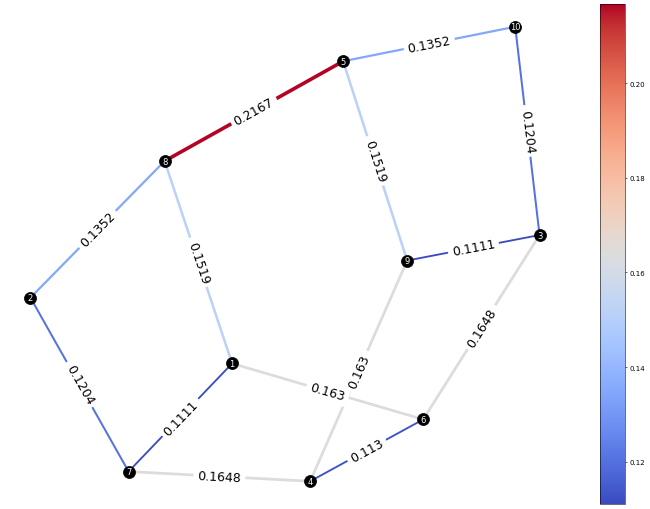

In [166]:
G = network_graph('brunson_southern-women')
res_e = nx.edge_betweenness_centrality(G)

print_res(res_e)

pos4 = draw_normalized(res_e, colormap = True, with_node_labels = True, edge_font_size = 18, pos = pos1)

#### Példa: edge betweenness ábrázolása egy .mtx gráffal

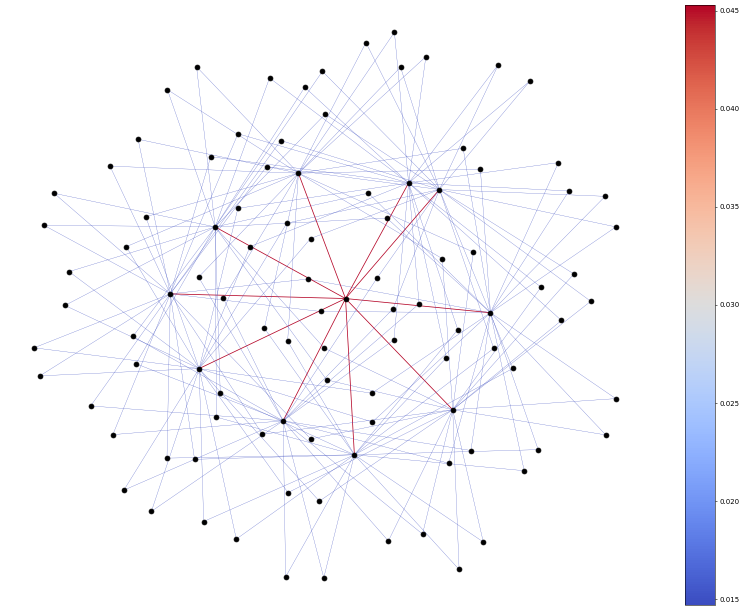

In [145]:
G = network_graph('GD06_theory.mtx')
res_e = nx.edge_betweenness_centrality(G)

pos5 = draw_normalized(res_e, colormap = True, with_edge_labels=False, fig_width=14, fig_height=12, pos = pos2)

<hr>
<hr>

In [93]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(2,5)
G.add_edge(2,6)
G.add_edge(5,6)
G.add_edge(3,7)
G.add_edge(3,8)
G.add_edge(7,8)
G.add_edge(4,10)
G.add_edge(4,9)
G.add_edge(9,10)

12


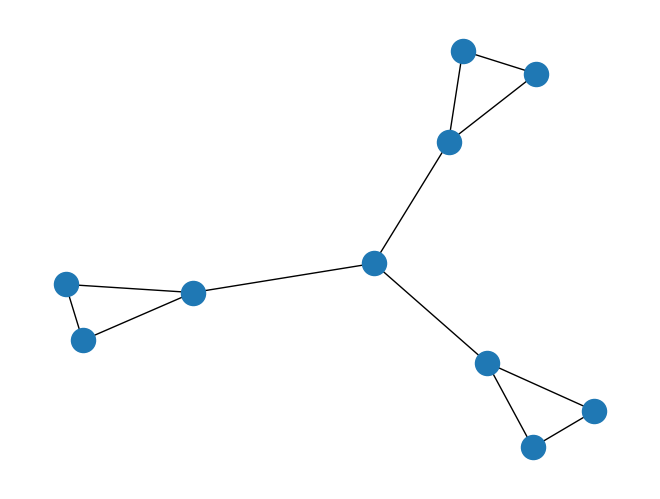

In [96]:
nx.draw(G)
print(len(G.edges))

In [97]:
res = ust_matrix(G, 10)

In [98]:
s = [[str(e) for e in row] for row in res]
lens = [max(map(len, col)) for col in zip(*s)]
fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
table = [fmt.format(*row) for row in s]
print('\n'.join(table))

(1, 2)	(1, 3)	(1, 4)	(2, 5)	(2, 6)	(3, 7)	(3, 8)	(4, 9)	(4, 10)	(5, 6)	(7, 8)	(9, 10)
1     	1     	1     	1     	0     	0     	1     	1     	1      	1     	1     	0      
1     	1     	1     	0     	1     	0     	1     	1     	0      	1     	1     	1      
1     	1     	1     	1     	1     	1     	0     	1     	1      	0     	1     	0      
1     	1     	1     	1     	0     	1     	1     	1     	1      	1     	0     	0      
1     	1     	1     	1     	0     	1     	1     	0     	1      	1     	0     	1      
1     	1     	1     	1     	1     	0     	1     	1     	1      	0     	1     	0      
1     	1     	1     	1     	1     	1     	1     	1     	1      	0     	0     	0      
1     	1     	1     	0     	1     	1     	0     	0     	1      	1     	1     	1      
1     	1     	1     	1     	1     	1     	0     	1     	1      	0     	1     	0      
1     	1     	1     	1     	1     	1     	0     	1     	0      	0     	1     	1      


In [103]:
normal_res = ust_normalized(res)

In [104]:
s = [[str(e) for e in row] for row in normal_res]
lens = [max(map(len, col)) for col in zip(*s)]
fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
table = [fmt.format(*row) for row in s]
print('\n'.join(table))

(1, 2)	(1, 3)	(1, 4)	(2, 5)	(2, 6)	(3, 7)	(3, 8)	(4, 9)	(4, 10)	(5, 6)	(7, 8)	(9, 10)
1.0   	1.0   	1.0   	0.8   	0.7   	0.7   	0.6   	0.8   	0.8    	0.5   	0.7   	0.4    


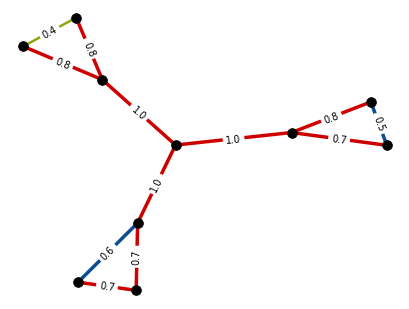

In [140]:
pos = draw_normalized(normal_res, edge_font_size = 14, fig_height = 6, fig_width=8, pos=pos)

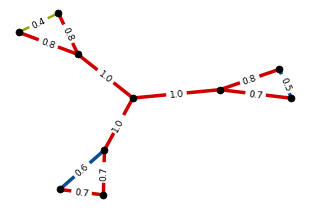

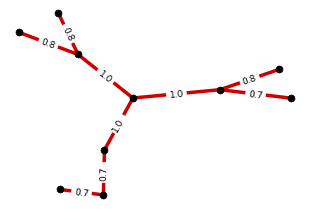

In [152]:
pos = draw_normalized(normal_res, edge_font_size = 13, fig_height = 4, fig_width=6, pos=pos, with_mst=True)

In [131]:
res_e = nx.edge_betweenness_centrality(G)
res_e = dict_to_array(res_e)

In [132]:
s = [[str(e) for e in row] for row in res_e]
lens = [max(map(len, col)) for col in zip(*s)]
fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
table = [fmt.format(*row) for row in s]
print('\n'.join(table))

(1, 2)	(1, 3)	(1, 4)	(2, 5)	(2, 6)	(3, 7)	(3, 8)	(4, 10)	(4, 9)	(5, 6)	(7, 8)	(10, 9)
0.4667	0.4667	0.4667	0.1778	0.1778	0.1778	0.1778	0.1778 	0.1778	0.0222	0.0222	0.0222 


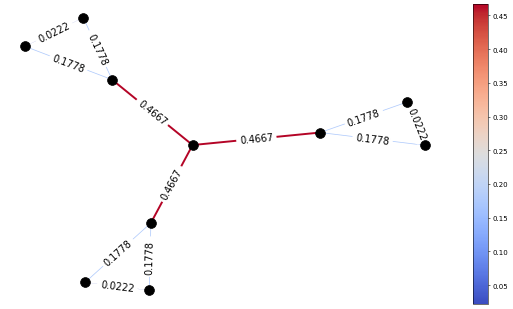

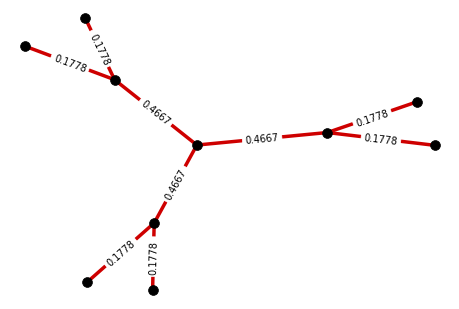

In [138]:
pos = draw_normalized(res_e, colormap = True, edge_font_size = 14, fig_height = 6, fig_width=9, pos = pos, with_mst=True)

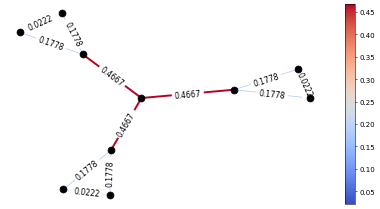

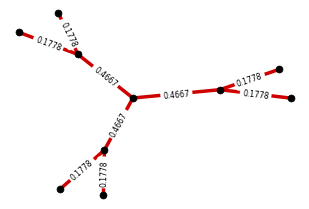

In [151]:
pos = draw_normalized(res_e, colormap = True, edge_font_size = 11, fig_height = 4, fig_width=6, pos=pos, with_mst=True)